##  Working with Spatial Data

1. Download Sentinel-2 imagery. Data can be download from Copernicus website (https://scihub.copernicus.eu/dhus/#/home) or Python code (Download Sentinel-2 Data.ipynb)
2. Import required python libraies
3. Visualise study area and Sentinel-2 imagery tile
4. Clip all bands to study area
5. Visualise study area
6. Read required images to calcualte the vegetation indices
7. Calculate NDVI and visualise
8. Calculate EVI and visualise
9. Exercises

In [ ]:
# Install Python libraies
# !pip install cartopy
# !pip install pyepsg

## 2. Import required python libraies

In [ ]:
# Import all required files
import glob
import sys
from osgeo import gdal, osr, ogr
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import FuncFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
!ls "/content/drive/My Drive/gis_day/vector_data/"

dehradun_area.dbf  dehradun_area.qpj  dehradun_area.shx
dehradun_area.prj  dehradun_area.shp  dehradun.geojson


## 3. Visualise study area and Sentinel-2 imagery tile

In [25]:
# Go to directory where all bands saved
dir = "/content/drive/My Drive/gis_day/raster_data/"
images = glob.glob(dir + "*.jp2")
for i in images:
    print(i)

/content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B02_10m.jp2
/content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B08_10m.jp2
/content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B04_10m.jp2
/content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B03_10m.jp2
/content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_TCI_10m.jp2


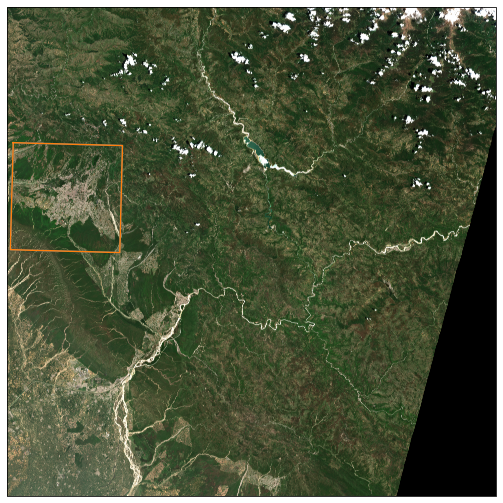

In [13]:
# Get directory of TCI from list of images
fname = images[4]
ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

# print(fname) 
# print(data.shape)
# print(gt)
# print(proj)
# print(inproj)

projcs = inproj.GetAuthorityCode('PROJCS')
projection = ccrs.epsg(projcs)

# print(projcs)
# print(projection)

# Visualise Raster (Sentine-2 Imagery)
subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent,
                origin='upper')

# Visualise Vector (Study area)
sf = shp.Reader("/content/drive/My Drive/gis_day/vector_data/dehradun_area.shp")
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

## 4. Clip all bands to study area

In [26]:
dir = "/content/drive/My Drive/gis_day/raster_data/"
file_names = ["blue.tif", "nir.tif", "red.tif", "green.tif", "tci.tif"]

In [27]:
xmin, ymin, xmax, ymax = sf.bbox # results [xmin, ymin, xmax, ymax] 
extent_sa = [xmin, ymax, xmax, ymin] # we need [xmin, ymax, xmax, ymax] as a input to click
# print(sf.bbox)
# print(extent) 

for i,j in zip(file_names, images):
    i = dir + i
    print(i, j)
    j = gdal.Open(j)
    image = gdal.Translate(i, j, projWin = extent_sa)
    print(i + " image Created")

/content/drive/My Drive/gis_day/raster_data/blue.tif /content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B02_10m.jp2
/content/drive/My Drive/gis_day/raster_data/blue.tif image Created
/content/drive/My Drive/gis_day/raster_data/nir.tif /content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B08_10m.jp2
/content/drive/My Drive/gis_day/raster_data/nir.tif image Created
/content/drive/My Drive/gis_day/raster_data/red.tif /content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B04_10m.jp2
/content/drive/My Drive/gis_day/raster_data/red.tif image Created
/content/drive/My Drive/gis_day/raster_data/green.tif /content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_B03_10m.jp2
/content/drive/My Drive/gis_day/raster_data/green.tif image Created
/content/drive/My Drive/gis_day/raster_data/tci.tif /content/drive/My Drive/gis_day/raster_data/T44RKU_20210603T052649_TCI_10m.jp2
/content/drive/My Drive/gis_day/raster_data/tci.tif image Created


##  5. Visualise Study area

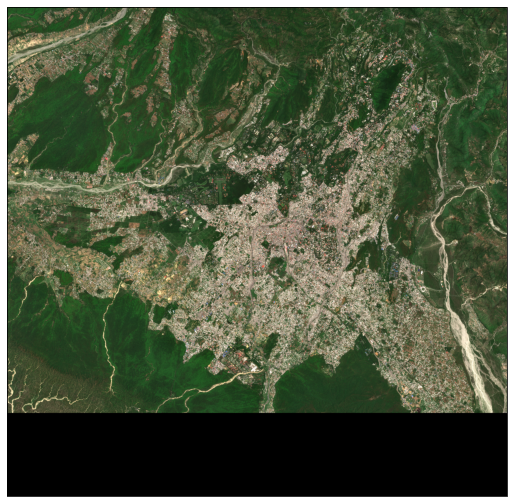

In [28]:
## Viasualise Dehradun Study area
ds = gdal.Open(dir + file_names[4])
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

# print(fname) 
# print(data.shape)
# print(gt)
# print(proj)
# print(inproj)

projcs = inproj.GetAuthorityCode('PROJCS')
projection = ccrs.epsg(projcs)

# print(projcs)
# print(projection)

# Visualise Raster (Sentine-2 Imagery)
subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent,
                origin='upper')
plt.show()

## 6. Reading all bands and converting as a numpy array

In [30]:
blue = gdal.Open(dir + file_names[0])
nir = gdal.Open(dir + file_names[1])
red = gdal.Open(dir + file_names[2])
green = gdal.Open(dir + file_names[3])

blue_array = np.array(blue.ReadAsArray())
green_array = np.array(green.ReadAsArray())
red_array = np.array(red.ReadAsArray())
nir_array = np.array(nir.ReadAsArray())

## 7. Calculate NDVI and Visualise

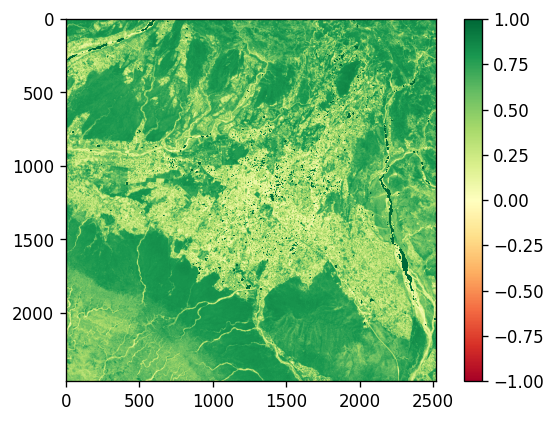

In [31]:
ndvi = (nir_array-red_array)/(nir_array+red_array)
plt.figure(figsize=(6, 4), dpi=120)
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

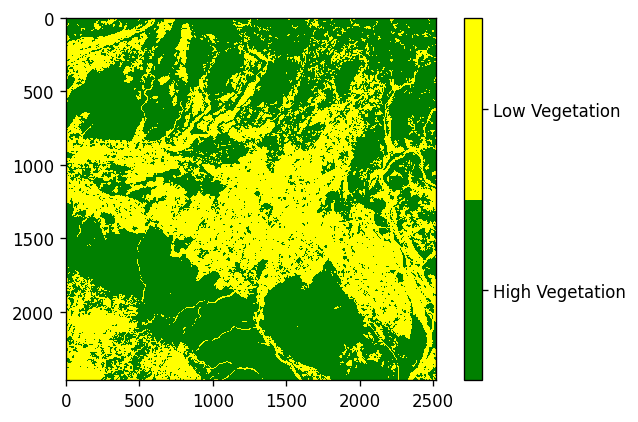

In [32]:
ndvi_class = np.where(ndvi < 0.6, 1, 0)
col_dict={0:"green",
            1:"Yellow"}
label_list = ["High Vegetation", "Low Vegetation"]

## We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

## Let's also define the description of each category
labels = np.array(label_list)
len_lab = len(labels)
    
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)

## Make normalizer and formatter
norm = BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = FuncFormatter(lambda x, pos: labels[norm(x)])
diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2

plt.figure(figsize=(6, 4), dpi=120)
plt.imshow(ndvi_class, cmap=cm, norm=norm)
plt.colorbar(format=fmt, ticks=tickz)
plt.show()

## 8. Calculate EVI and Visualise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


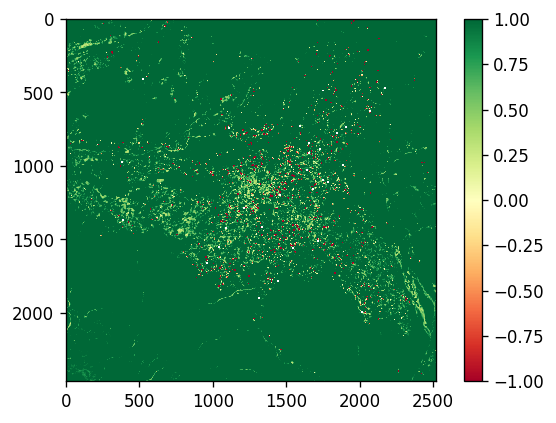

In [33]:
# EVI
L, C1, C2, G = 1, 6, 7.5, 2.5
# blue = np.array(gdal.Open(bands[1]).ReadAsArray())
evi = G * ((nir_array-red_array)/(nir_array+C1*red_array-C2*blue_array+L))

plt.figure(figsize=(6, 4), dpi=120)
plt.imshow(evi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

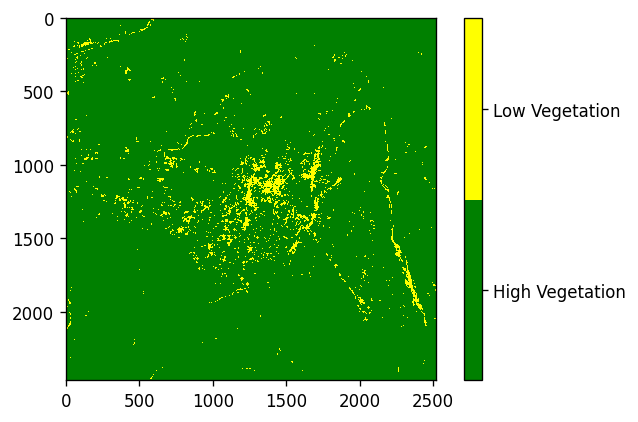

In [34]:
evi_class = np.where(evi < 0.5, 1, 0)

plt.figure(figsize=(6, 4), dpi=120)
plt.imshow(evi_class, cmap=cm, norm=norm)
plt.colorbar(format=fmt, ticks=tickz)
plt.show()

## 9. Save image

In [35]:
outdriver = gdal.GetDriverByName("GTiff")
shp = blue_array.shape
print(shp)
output_image = "output_ndvi.tif"
outdata = outdriver.Create(output_image, shp[1], shp[0], 1, gdal.GDT_Float32)
outdata.GetRasterBand(1).WriteArray(ndvi) # change the array
trans = blue.GetGeoTransform()
proj = blue.GetProjection()
outdata.SetGeoTransform(trans)
outdata.SetProjection(proj)
print("Output saved in the device")
sys.exit()

(2466, 2517)
Output saved in the device


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 10. Excercises:
calculate and visualise following indices

* GDAL: https://www.gis.usu.edu/~chrisg/python/2009/
* Cartopy: https://colab.research.google.com/github/astg606/py_materials/blob/master/visualization/introduction_cartopy.ipynb